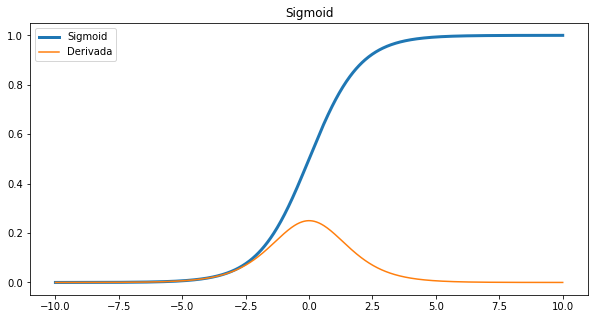

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))

x = np.linspace(-10, 10, 1000)
y = np.minimum(np.maximum(0, x),6)

plt.figure(figsize=(10,5))
plt.plot(x, list(map(lambda x: sigmoid(x),x)), label="Sigmoid", lw=3)
plt.plot(x, list(map(lambda x: der_sigmoid(x),x)), label="Derivada")
plt.title("Sigmoid")
plt.legend()
plt.show();

In [0]:
# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

In [0]:
#import SparkSession
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Regresion_logistica').getOrCreate()

In [0]:
# Cargamos los datos
filename = "/FileStore/tables/Log_Reg_dataset.csv"
df = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
#display(df)
df.show(10)

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
|   Brazil| 32|             0|  Google|               3|     0|
|   Brazil| 32|             0|  Google|               6|     0|
|Indonesia| 27|             0|  Google|               9|     0|
|Indonesia| 32|             0|   Yahoo|               2|     0|
|Indonesia| 31|             1|    Bing|              16|     1|
+---------+---+--------------+--------+----------------+------+
only showing top 10 rows



In [0]:
from pyspark.ml.feature import StringIndexer
search_engine_indexer = StringIndexer(inputCol="Platform", outputCol="Search_Engine_Num").fit(df)
df = search_engine_indexer.transform(df)
df.show(3,False)

+-------+---+--------------+--------+----------------+------+-----------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|
+-------+---+--------------+--------+----------------+------+-----------------+
|India  |41 |1             |Yahoo   |21              |1     |0.0              |
|Brazil |28 |1             |Yahoo   |5               |0     |0.0              |
|Brazil |40 |0             |Google  |3               |0     |1.0              |
+-------+---+--------------+--------+----------------+------+-----------------+
only showing top 3 rows



In [0]:
df.groupBy('Platform').count().orderBy('count',ascending=False).show(5,False)

+--------+-----+
|Platform|count|
+--------+-----+
|Yahoo   |4902 |
|Google  |2950 |
|Bing    |2148 |
+--------+-----+



In [0]:
df.groupBy("Search_Engine_Num").count().orderBy('count',ascending=False).show(5,False)

+-----------------+-----+
|Search_Engine_Num|count|
+-----------------+-----+
|0.0              |4902 |
|1.0              |2950 |
|2.0              |2148 |
+-----------------+-----+



In [0]:
df.show(3)

+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|Search_Engine_Vector|
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|  India| 41|             1|   Yahoo|              21|     1|              0.0|       (2,[0],[1.0])|
| Brazil| 28|             1|   Yahoo|               5|     0|              0.0|       (2,[0],[1.0])|
| Brazil| 40|             0|  Google|               3|     0|              1.0|       (2,[1],[1.0])|
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
only showing top 3 rows



In [0]:
from pyspark.ml.feature import OneHotEncoder

In [0]:
#one hot encoding
search_engine_encoder = OneHotEncoder(inputCol="Search_Engine_Num", outputCol="Search_Engine_Vector")
df = search_engine_encoder.fit(df).transform(df)

---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-3781159496241903>:3
      1 #one hot encoding
      2 search_engine_encoder = OneHotEncoder(inputCol="Search_Engine_Num", outputCol="Search_Engine_Vector")
----> 3 df = search_engine_encoder.fit(df).transform(df)

File /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py:30, in _create_patch_function.<locals>.patched_method(self, *args, **kwargs)
     28 call_succeeded = False
     29 try:
---> 30     result = original_method(self, *args, **kwargs)
     31     call_succeeded = True
     32     return result

File /databricks/spark/python/pyspark/ml/base.py:205, in Estimator.fit(self, dataset, params)
    203         return self.copy(params)._fit(dataset)
    204     else:
--> 205         return self._fit(dataset)
    206 else:
    207     raise TypeError(
    208         "Params must be either a param 

In [0]:
df.show(3,False)

+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|Search_Engine_Vector|
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|India  |41 |1             |Yahoo   |21              |1     |0.0              |(2,[0],[1.0])       |
|Brazil |28 |1             |Yahoo   |5               |0     |0.0              |(2,[0],[1.0])       |
|Brazil |40 |0             |Google  |3               |0     |1.0              |(2,[1],[1.0])       |
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
only showing top 3 rows



In [0]:
df.groupBy('Platform').count().orderBy('count',ascending=False).show(5,False)

+--------+-----+
|Platform|count|
+--------+-----+
|Yahoo   |4902 |
|Google  |2950 |
|Bing    |2148 |
+--------+-----+



In [0]:
df.groupBy('Search_Engine_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------------+-----+
|Search_Engine_Num|count|
+-----------------+-----+
|0.0              |4902 |
|1.0              |2950 |
|2.0              |2148 |
+-----------------+-----+



In [0]:
df.groupBy('Search_Engine_Vector').count().orderBy('count',ascending=False).show(5,False)

+--------------------+-----+
|Search_Engine_Vector|count|
+--------------------+-----+
|(2,[0],[1.0])       |4902 |
|(2,[1],[1.0])       |2950 |
|(2,[],[])           |2148 |
+--------------------+-----+



In [0]:
country_indexer = StringIndexer(inputCol="Country", outputCol="Country_Num").fit(df)
df = country_indexer.transform(df)

In [0]:
df.groupBy('Country').count().orderBy('count',ascending=False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|6064 |
|India    |2013 |
|Brazil   |1290 |
|Malaysia |633  |
+---------+-----+



In [0]:
df.groupBy('Country_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |6064 |
|1.0        |2013 |
|2.0        |1290 |
|3.0        |633  |
+-----------+-----+



In [0]:
#one hot encoding
country_encoder = OneHotEncoder(inputCol="Country_Num", outputCol="Country_Vector")
df = country_encoder.fit(df).transform(df)

In [0]:
df.select(['Country','country_Num','Country_Vector']).show(3,False)

+-------+-----------+--------------+
|Country|country_Num|Country_Vector|
+-------+-----------+--------------+
|India  |1.0        |(3,[1],[1.0]) |
|Brazil |2.0        |(3,[2],[1.0]) |
|Brazil |2.0        |(3,[2],[1.0]) |
+-------+-----------+--------------+
only showing top 3 rows



In [0]:
df.groupBy('Country').count().orderBy('count',ascending=False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|6064 |
|India    |2013 |
|Brazil   |1290 |
|Malaysia |633  |
+---------+-----+



In [0]:
df.groupBy('Country_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |6064 |
|1.0        |2013 |
|2.0        |1290 |
|3.0        |633  |
+-----------+-----+



In [0]:
df.groupBy('Country_Vector').count().orderBy('count',ascending=False).show(5,False)

+--------------+-----+
|Country_Vector|count|
+--------------+-----+
|(3,[0],[1.0]) |6064 |
|(3,[1],[1.0]) |2013 |
|(3,[2],[1.0]) |1290 |
|(3,[],[])     |633  |
+--------------+-----+



In [0]:
df.show(5)

+---------+---+--------------+--------+----------------+------+-----------------+--------------------+-----------+--------------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|Search_Engine_Vector|Country_Num|Country_Vector|
+---------+---+--------------+--------+----------------+------+-----------------+--------------------+-----------+--------------+
|    India| 41|             1|   Yahoo|              21|     1|              0.0|       (2,[0],[1.0])|        1.0| (3,[1],[1.0])|
|   Brazil| 28|             1|   Yahoo|               5|     0|              0.0|       (2,[0],[1.0])|        2.0| (3,[2],[1.0])|
|   Brazil| 40|             0|  Google|               3|     0|              1.0|       (2,[1],[1.0])|        2.0| (3,[2],[1.0])|
|Indonesia| 31|             1|    Bing|              15|     1|              2.0|           (2,[],[])|        0.0| (3,[0],[1.0])|
| Malaysia| 32|             0|  Google|              15|     1|              1.0|       (2

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
df_assembler = VectorAssembler(inputCols=['Search_Engine_Vector','Country_Vector','Age', 'Repeat_Visitor',
                                          'Web_pages_viewed'], outputCol="features")

df = df_assembler.transform(df)

In [0]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Search_Engine_Num: double (nullable = false)
 |-- Search_Engine_Vector: vector (nullable = true)
 |-- Country_Num: double (nullable = false)
 |-- Country_Vector: vector (nullable = true)
 |-- features: vector (nullable = true)



In [0]:
df.select(['features','Status']).show(10,False)

+-----------------------------------+------+
|features                           |Status|
+-----------------------------------+------+
|[1.0,0.0,0.0,1.0,0.0,41.0,1.0,21.0]|1     |
|[1.0,0.0,0.0,0.0,1.0,28.0,1.0,5.0] |0     |
|(8,[1,4,5,7],[1.0,1.0,40.0,3.0])   |0     |
|(8,[2,5,6,7],[1.0,31.0,1.0,15.0])  |1     |
|(8,[1,5,7],[1.0,32.0,15.0])        |1     |
|(8,[1,4,5,7],[1.0,1.0,32.0,3.0])   |0     |
|(8,[1,4,5,7],[1.0,1.0,32.0,6.0])   |0     |
|(8,[1,2,5,7],[1.0,1.0,27.0,9.0])   |0     |
|(8,[0,2,5,7],[1.0,1.0,32.0,2.0])   |0     |
|(8,[2,5,6,7],[1.0,31.0,1.0,16.0])  |1     |
+-----------------------------------+------+
only showing top 10 rows



In [0]:
#select data for building model
model_df=df.select(['features','Status'])

In [0]:
#split the data 
training_df,test_df=model_df.randomSplit([0.75,0.25])

In [0]:
training_df.show(5)

+--------------------+------+
|            features|Status|
+--------------------+------+
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
+--------------------+------+
only showing top 5 rows



In [0]:
training_df.count()

Out[36]: 7471

In [0]:
training_df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 3756|
|     0| 3715|
+------+-----+



In [0]:
test_df.count()

Out[38]: 2529

In [0]:
test_df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 1233|
|     0| 1296|
+------+-----+



In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
log_reg=LogisticRegression(labelCol='Status').fit(training_df)

In [0]:
train_results=log_reg.evaluate(training_df).predictions

In [0]:
train_results.show(5)

+--------------------+------+--------------------+--------------------+----------+
|            features|Status|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(8,[0,2,5,7],[1.0...|     0|[5.92772970656624...|[0.99734255644375...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.92772970656624...|[0.99734255644375...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.92772970656624...|[0.99734255644375...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.16317561242476...|[0.99430907677840...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.16317561242476...|[0.99430907677840...|       0.0|
+--------------------+------+--------------------+--------------------+----------+
only showing top 5 rows



In [0]:
train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).select(['Status','prediction','probability']).show(10,False)

+------+----------+-----------------------------------------+
|Status|prediction|probability                              |
+------+----------+-----------------------------------------+
|1     |1.0       |[0.2782302566683502,0.7217697433316498]  |
|1     |1.0       |[0.07710371986253597,0.922896280137464]  |
|1     |1.0       |[0.07710371986253597,0.922896280137464]  |
|1     |1.0       |[0.07710371986253597,0.922896280137464]  |
|1     |1.0       |[0.03743774144552037,0.9625622585544796] |
|1     |1.0       |[0.03743774144552037,0.9625622585544796] |
|1     |1.0       |[0.017784673384729877,0.9822153266152701]|
|1     |1.0       |[0.017784673384729877,0.9822153266152701]|
|1     |1.0       |[0.017784673384729877,0.9822153266152701]|
|1     |1.0       |[0.017784673384729877,0.9822153266152701]|
+------+----------+-----------------------------------------+
only showing top 10 rows



In [0]:
correct_preds=train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).count()

In [0]:
training_df.filter(training_df['Status']==1).count()

Out[46]: 3756

In [0]:
#accuracy on training dataset 
float(correct_preds)/(training_df.filter(training_df['Status']==1).count())

Out[47]: 0.9387646432374867

In [0]:
results=log_reg.evaluate(test_df).predictions
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Status: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [0]:
results.select(['Status','prediction']).show(10,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |0.0       |
+------+----------+
only showing top 10 rows



In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
#confusion matrix
true_postives = results[(results.Status == 1) & (results.prediction == 1)].count()
true_negatives = results[(results.Status == 0) & (results.prediction == 0)].count()
false_positives = results[(results.Status == 0) & (results.prediction == 1)].count()
false_negatives = results[(results.Status == 1) & (results.prediction == 0)].count()

In [0]:
print (true_postives)
print (true_negatives)
print (false_positives)
print (false_negatives)
print(true_postives+true_negatives+false_positives+false_negatives)
print (results.count())

1160
1210
86
73
2529
2529


In [0]:
accuracy=float((true_postives+true_negatives) /(results.count()))
print(accuracy)

0.9371293001186239


In [0]:
precision = float(true_postives) / (true_postives + false_positives)
print(precision)

0.9309791332263242


In [0]:
pyspark_yhat = log_reg.transform(test_df)

In [0]:
pyspark_logistic_regression_method_assessment = log_reg.summary
pyspark_logistic_regression_method_roc = pyspark_logistic_regression_method_assessment.roc.toPandas()
pyspark_logistic_regression_method_auroc = pyspark_logistic_regression_method_assessment.areaUnderROC

In [0]:
# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

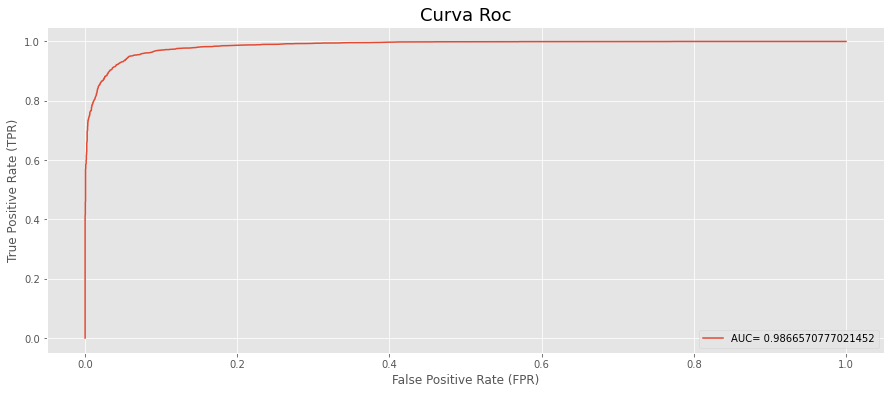

In [0]:
plt.figure(figsize=(15, 6))
plt.plot(pyspark_logistic_regression_method_roc["FPR"], pyspark_logistic_regression_method_roc["TPR"],
         label="AUC= "+str(pyspark_logistic_regression_method_auroc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.title("Curva Roc", size=18);
plt.show();

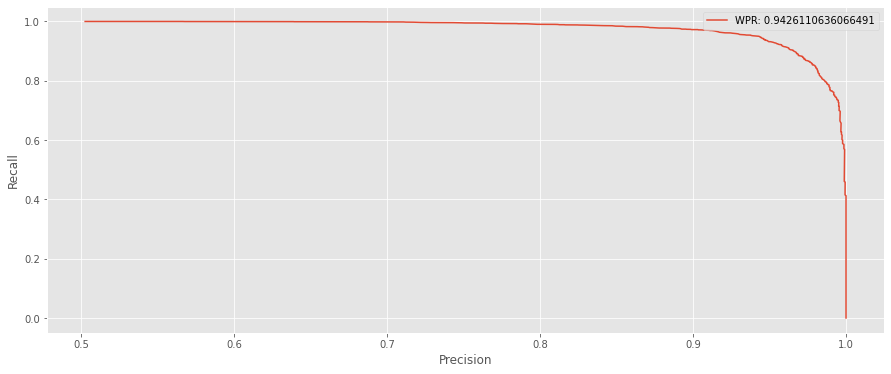

In [0]:
pyspark_logistic_regression_method_assessment = log_reg.summary
pyspark_logistic_regression_method_assessment_pr = pyspark_logistic_regression_method_assessment.pr.toPandas()
pyspark_logistic_regression_method_assessment_wpr = pyspark_logistic_regression_method_assessment.weightedPrecision

plt.figure(figsize=(15, 6))
plt.plot(pyspark_logistic_regression_method_assessment_pr["precision"],pyspark_logistic_regression_method_assessment_pr["recall"],
         label="WPR: "+str(pyspark_logistic_regression_method_assessment_wpr))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.classification import LogisticRegression

In [0]:
# Iniciar una nueva corrida de MLflow
with mlflow.start_run():
    # Crear y entrenar el modelo de regresión logística
    lr = LogisticRegression(featuresCol='features', labelCol='Status')
    lr_model = lr.fit(training_df)
    
    # Hacer predicciones
    predictions = lr_model.transform(test_df)
    predictions.show(5)

    # Registrar el modelo con MLflow
    mlflow.spark.log_model(lr_model, "Modelo_logitico")

    # Registrar métricas y parámetros
    mlflow.log_param("intercept", lr_model.interceptVector)
    mlflow.log_param("num_features", len(lr_model.coefficients))
    mlflow.log_metric("accuracy", lr_model.summary.accuracy)
    mlflow.log_metric("precision", lr_model.summary.weightedPrecision)
    mlflow.log_metric("recall", lr_model.summary.weightedRecall)

    print("Modelo registrado y parámetros guardados con MLflow")